In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
sns.set_style("darkgrid")

#If Need to re-download some files saved earlier//or scrape again. 
import requests # library to handle requests
import lxml.html as lh
import bs4 as bs
import urllib.request

from IPython.display import HTML
import base64

print('Libraries imported.')

Libraries imported.


In [2]:
sg_food_csv  = r'https://raw.githubusercontent.com/crismag/Coursera_Capstone/master/saved_data/singapore_food_venues.600Scores.Category.csv'
venue_columns = ['Town','Town Latitude','Town Longitude','VenueID','VenueName','score','category','catID','latitude','longitude']
singapore_food_venues      = pd.read_csv(sg_food_csv, usecols=venue_columns, encoding = "ISO-8859-1")

# Eliminate possible venue duplicates.
singapore_town_venues = singapore_food_venues[venue_columns]
# Drop rows with score == 0
singapore_town_venues = singapore_town_venues[singapore_town_venues.score > 0.0]
# Drop rows with missing elements
singapore_town_venues = singapore_town_venues.dropna(axis='columns')

singapore_town_venues.head()

,Town,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
2,ANG MO KIO,1.369972,103.849588,50138eaee4b05d9dc80ae5b0,Hong Kong Sheng Kee Dessert ??????,5.8,Dessert Shops,4bf58dd8d48988d1d0941735,1.369473,103.849241
4,ANG MO KIO,1.369972,103.849588,5be2d3831af8520039a38da2,Malaysia Boleh!,7.5,Food Courts,4bf58dd8d48988d120951735,1.369669,103.848900
5,ANG MO KIO,1.369972,103.849588,4b7cdf36f964a520fda72fe3,BreadTalk / Toast Box,5.5,Breakfast Spots,4bf58dd8d48988d143941735,1.369177,103.848874
7,ANG MO KIO,1.369972,103.849588,4b1e9fc6f964a520d21c24e3,Ichiban Sushi,5.6,Sushi Restaurants,4bf58dd8d48988d1d2941735,1.369156,103.849109
10,ANG MO KIO,1.369972,103.849588,5340222411d247b11bb27bb8,Eighteen Chefs,5.5,Diners,4bf58dd8d48988d147941735,1.369265,103.848706


In [3]:

sg_top_clusters = r'https://raw.githubusercontent.com/crismag/Coursera_Capstone/master/saved_data/sg_top_clusters.csv'
sg_town_clusters = pd.read_csv(sg_top_clusters)
#sg_town_clusters.head()

In [4]:

rent_cluster_df = sg_town_clusters[['Town','median_rent','Cluster Labels']].copy()


In [5]:
# one hot encoding
sg_onehot = pd.get_dummies(singapore_town_venues[['category']], prefix="", prefix_sep="")

# add Town column back to dataframe
sg_onehot['Town'] = singapore_town_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

# Check returned one hot encoding data:
print('One hot encoding returned "{}" rows.'.format(sg_onehot.shape[0]))

# Regroup rows by town and mean of frequency occurrence per category.
sg_grouped_mean = sg_onehot.groupby('Town').mean().reset_index()
sg_grouped_sum  = sg_onehot.groupby('Town').sum().reset_index()

print('One hot [MEAN] encoding re-group returned "{}" rows.'.format(sg_grouped_mean.shape[0]))
print('One hot [SUM] encoding re-group returned "{}" rows.'.format(sg_grouped_sum.shape[0]))

One hot encoding returned "644" rows.
One hot [MEAN] encoding re-group returned "25" rows.
One hot [SUM] encoding re-group returned "25" rows.


In [6]:

print("sg_grouped_mean")
sg_grouped_mean.head()

sg_grouped_mean


,Town,American Restaurants,Asian Restaurants,BBQ Joints,Bakeries,Bars,Bistros,Breakfast Spots,Breweries,Bubble Tea Shops,...,Snack Places,Soup Places,Steakhouses,Sushi Restaurants,Taiwanese Restaurants,Thai Restaurants,Udon Restaurants,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Wings Joints
0,ANG MO KIO,0.000000,0.000000,0.0,0.029412,0.0,0.000000,0.029412,0.0,0.029412,...,0.029412,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.000000
1,BEDOK,0.034483,0.034483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.068966,0.0,0.000000,0.0,0.0,0.0,0.034483
2,BISHAN,0.027778,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.055556,...,0.000000,0.0,0.0,0.000000,0.0,0.027778,0.0,0.0,0.0,0.000000
3,BUKIT BATOK,0.000000,0.045455,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.045455,0.0,0.0,0.0,0.000000
4,BUKIT MERAH,0.000000,0.000000,0.0,0.000000,0.0,0.111111,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [7]:

print("sg_grouped_sum")
sg_grouped_sum.head()

sg_grouped_sum


,Town,American Restaurants,Asian Restaurants,BBQ Joints,Bakeries,Bars,Bistros,Breakfast Spots,Breweries,Bubble Tea Shops,...,Snack Places,Soup Places,Steakhouses,Sushi Restaurants,Taiwanese Restaurants,Thai Restaurants,Udon Restaurants,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Wings Joints
0,ANG MO KIO,0,0,0,1,0,0,1,0,1,...,1,0,0,2,0,0,0,0,0,0
1,BEDOK,1,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
2,BISHAN,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0
3,BUKIT BATOK,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,BUKIT MERAH,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
scaler = StandardScaler()
standardized_price = scaler.fit_transform(sg_town_clusters[['median_rent']])

# add the normalized price to the dataframe
sg_town_clusters = pd.DataFrame(sg_grouped_sum)
sg_town_clusters['median_rent_std'] = standardized_price

print(sg_town_clusters.shape)
sg_town_clusters

(25, 69)


,Town,American Restaurants,Asian Restaurants,BBQ Joints,Bakeries,Bars,Bistros,Breakfast Spots,Breweries,Bubble Tea Shops,...,Soup Places,Steakhouses,Sushi Restaurants,Taiwanese Restaurants,Thai Restaurants,Udon Restaurants,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Wings Joints,median_rent_std
0,ANG MO KIO,0,0,0,1,0,0,1,0,1,...,0,0,2,0,0,0,0,0,0,-0.117356
1,BEDOK,1,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0.196301
2,BISHAN,1,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,1.040763
3,BUKIT BATOK,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-0.527523
4,BUKIT MERAH,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.630596
5,BUKIT PANJANG,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,-1.830407
6,CENTRAL,1,1,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,0,0,2.295392
7,CHOA CHU KANG,0,2,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,-0.696416
8,CLEMENTI,1,2,0,0,0,0,0,0,0,...,1,1,0,0,2,0,0,0,0,1.214481
9,GEYLANG,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,2,0,0,0.654723


In [9]:
lreg = LinearRegression(normalize=True)

X = sg_town_clusters.drop(columns=['Town', 'median_rent_std'])
y = sg_town_clusters['median_rent_std']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = lreg.fit(X_train, y_train)

In [10]:
y_pred = lreg.predict(X_test)

r2s = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
lreg_coeff_pos = lreg.coef_[np.argsort(-lreg.coef_)[:10]]
lreg_coeff_neg = lreg.coef_[np.argsort(lreg.coef_)[:10]]
lreg_coeff_abs = abs(lreg.coef_)
lreg_coeff_max = "";#lreg.coef_[np.argsort(lreg_coeff_abs)[:10]]
lreg_coeff_min = lreg.coef_[np.argsort(lreg_coeff_abs)[:10]]

print('R2-score           :', r2s )
print('MEAN Squared Error :', mse )
print('ABS coefs          :', lreg_coeff_abs)
print('Coefficients:')
print('\tPOSITIVE = ',lreg_coeff_pos)
print('\tNEGATIVE = ',lreg_coeff_neg)
print('Venue types nearly correlated      :', X.columns[np.argsort(-lreg.coef_)[:10]].values)
print('Venue types inversely correlated   :', X.columns[np.argsort(lreg.coef_)[:10]].values)
print('Venue types not correlated         :', X.columns[np.argsort(lreg_coeff_abs)[:10]].values)

R2-score           : -0.010661629848085719
MEAN Squared Error : 1.2316584294293538
ABS coefs          : [2.28398100e-01 2.01078675e-01 1.42682682e-01 1.97894138e-01
 7.61245666e-01 1.43316513e-01 7.01449836e-02 2.21944470e-01
 2.61890972e-01 2.21944470e-01 3.57191183e-01 4.44089210e-16
 1.03510406e-01 2.21944470e-01 2.21944470e-01 1.11022302e-16
 8.71719474e-02 1.00764830e-02 2.77555756e-17 2.13323822e-02
 8.50319432e-02 5.55183244e-02 2.21944470e-01 3.51828252e-01
 0.00000000e+00 3.83842613e-02 2.61480467e-01 1.02580757e-01
 0.00000000e+00 1.57289085e-01 4.86281979e-02 2.21944470e-01
 1.17667107e+00 5.44064873e-01 2.50124386e-01 1.86573214e-01
 2.95448960e-01 1.01612781e-01 4.46994253e-02 2.35044200e-01
 1.41113976e-01 1.14502829e-01 1.50288764e-01 0.00000000e+00
 2.10144149e-01 7.86976088e-02 2.21944470e-01 7.01449836e-02
 7.01449836e-02 8.04958574e-02 1.97954014e-01 3.28253294e-01
 7.59977690e-02 1.46766078e-01 6.67590862e-02 1.00596098e-01
 4.86281979e-02 1.92948178e-01 5.58568748e

In [11]:
X = sg_town_clusters.drop(columns=['Town', 'median_rent_std'])
y = sg_town_clusters['median_rent_std']

pca   = PCA(svd_solver='auto', random_state=0)
X_pca = pca.fit_transform(scale(X))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by the scale function.


In [12]:
n_component_list = range(1, 25)
r2_list = []
mse_list = []

# Second, Linear Regression
for i in n_component_list:
    lreg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:i], y, test_size=0.2, random_state=0)
    model = lreg.fit(X_train, y_train)
    # check the result
    y_pred = lreg.predict(X_test)
    r2 = r2_score(y_test, y_pred) # r2 score
    mse = mean_squared_error(y_test, y_pred) # mse
    r2_list.append(r2)
    mse_list.append(mse)
    
scores_df = pd.DataFrame.from_dict(dict([('NComponents', n_component_list),
                                        ('R2', r2_list),
                                        ('MSE', mse_list)]))
scores_df.set_index('NComponents', inplace=True)

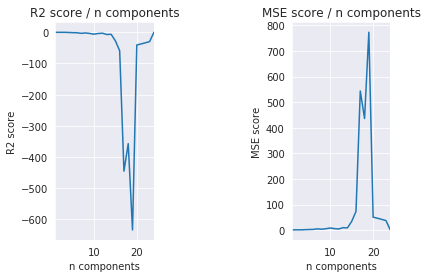

In [13]:
# plot the scores to see the best n_components
plt.subplot(1, 3, 1)
scores_df['R2'].plot(kind='line')
plt.title('R2 score / n components')
plt.ylabel('R2 score')
plt.xlabel('n components')

plt.subplot(1, 3, 3)
scores_df['MSE'].plot(kind='line')
plt.title('MSE score / n components')
plt.ylabel('MSE score')
plt.xlabel('n components')

plt.show()

In [14]:

r2_max = scores_df['R2'].idxmax()
print("Best n:", r2_max, "R2 score:", scores_df['R2'][r2_max])

mse_min = scores_df['MSE'].idxmin()
print("Best n:", mse_min, "MSE:", scores_df['MSE'][mse_min])

Best n: 24 R2 score: 0.1139364649774488
Best n: 24 MSE: 1.0798150337265064


In [15]:
lreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:r2_max], y, test_size=0.2, random_state=0)
model = lreg.fit(X_train, y_train)

# check the result
y_pred = lreg.predict(X_test)
r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score:", r2)
print("MSE:", mse)

R2 score: 0.1139364649774488
MSE: 1.0798150337265064


In [16]:
corelate_mtx = np.corrcoef(X_train.T)

eig_vals, eig_vecs = np.linalg.eig(corelate_mtx)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)
print('eig_vecs.shape',eig_vecs.shape)
print('eig_vals.shape',eig_vals.shape)

eig_vecs.shape (24, 24)
eig_vals.shape (24,)


In [17]:

# Let's check which venue types effect the most and least


eig_val_max_pos = eig_vals[np.argsort(-eig_vals)[:10]]
eig_val_max_neg = eig_vals[np.argsort(eig_vals)[:10]]
coef_abs = abs(eig_vals)
print('Coefficients:')
print('\tPOSITIVE = ',eig_val_max_pos)
print('\tNEGATIVE = ',eig_val_max_neg)
print('Venue types nearly correlated      :', X.columns[np.argsort(-eig_vals)[:10]].values)
print('Venue types inversely correlated   :', X.columns[np.argsort(eig_vals)[:10]].values)
print('Venue types not correlated         :', X.columns[np.argsort(coef_abs)[:10]].values)
print('Min coefs                          :', eig_vals[np.argsort(coef_abs)[:10]])

Coefficients:
	POSITIVE =  [1.96093109+0.j 1.76568642+0.j 1.54265759+0.j 1.51104148+0.j
 1.35646371+0.j 1.32401116+0.j 1.29234793+0.j 1.21672339+0.j
 1.19957332+0.j 1.1571613 +0.j]
	NEGATIVE =  [-5.53003366e-17+0.00000000e+00j  2.24092258e-17+0.00000000e+00j
  3.49081501e-17-1.36962296e-16j  3.49081501e-17+1.36962296e-16j
  1.68285690e-16+0.00000000e+00j  1.00932766e+00+0.00000000e+00j
  1.03599833e+00+0.00000000e+00j  1.04319136e+00+0.00000000e+00j
  1.04984710e+00+0.00000000e+00j  1.06762085e+00+0.00000000e+00j]
Venue types nearly correlated      : ['American Restaurants' 'Asian Restaurants' 'BBQ Joints' 'Bakeries' 'Bars'
 'Bistros' 'Breakfast Spots' 'Breweries' 'Bubble Tea Shops'
 'Burger Joints']
Venue types inversely correlated   : ['Dumpling Restaurants' 'Dongbei Restaurants' 'Diners'
 'Dim Sum Restaurants' 'Dessert Shops' 'Buffets' 'Cantonese Restaurants'
 'Chinese Breakfast Places' 'Cha Chaan Tengs' 'Chinese Restaurants']
Venue types not correlated         : ['Dongbei Restauran